In [1]:
import nltk
from nltk.corpus import movie_reviews
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
from afinn import Afinn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, PrecisionRecallDisplay, ConfusionMatrixDisplay
from konlpy.tag import Okt

In [6]:
movie_reviews.fileids()[:10]

['neg/cv000_29416.txt',
 'neg/cv001_19502.txt',
 'neg/cv002_17424.txt',
 'neg/cv003_12683.txt',
 'neg/cv004_12641.txt',
 'neg/cv005_29357.txt',
 'neg/cv006_17022.txt',
 'neg/cv007_4992.txt',
 'neg/cv008_29326.txt',
 'neg/cv009_29417.txt']

In [2]:
len(movie_reviews.fileids(categories='pos')), len(movie_reviews.fileids(categories='neg'))

(1000, 1000)

In [7]:
fileids = movie_reviews.fileids()
reviews = [movie_reviews.raw(fileid) for fileid in fileids]
categories = [movie_reviews.categories(fileid)[0] for fileid in fileids]

In [9]:
TextBlob(reviews[0]).sentiment

Sentiment(polarity=0.06479782948532947, subjectivity=0.5188408350908352)

In [10]:
def sentiment_TextBlob(docs):
    return ['pos' if TextBlob(doc).sentiment.polarity > 0 else 'neg' for doc in docs]

In [11]:
accuracy_score(categories, sentiment_TextBlob(reviews))

0.6

In [12]:
def sentiment_Afinn(docs):
    return ['pos' if Afinn(emoticons=True).score(doc) > 0 else 'neg' for doc in docs]

In [13]:
accuracy_score(categories, sentiment_Afinn(reviews))

0.664

In [14]:
def sentiment_vader(docs):
    return ['pos' if SentimentIntensityAnalyzer().polarity_scores(doc)['compound'] else 'neg' for doc in docs]

In [19]:
accuracy_score(categories, sentiment_vader(reviews))

0.5

In [20]:
X_train, X_test, y_train, y_test = train_test_split(reviews, categories, stratify=categories, test_size=0.2, random_state=7)
len(X_train), len(X_test)

(1600, 400)

In [32]:
tfidf = TfidfVectorizer(token_pattern=r"[\w']{2,}", min_df=2, max_df=0.5)
X_train_tf = tfidf.fit_transform(X_train)
X_test_tf = tfidf.transform(X_test)
X_train_tf.shape, X_test_tf.shape

((1600, 22616), (400, 22616))

In [33]:
nb_clf = MultinomialNB(alpha=1).fit(X_train_tf, y_train)
nb_clf.score(X_train_tf, y_train), nb_clf.score(X_test_tf, y_test)

(0.9675, 0.8225)

In [34]:
df = pd.read_csv('./data/daum_movie_review.csv')
df.head()

,review,rating,date,title
0,돈 들인건 티가 나지만 보는 내내 하품만,1,2018.10.29,인피니티 워
1,몰입할수밖에 없다. 어렵게 생각할 필요없다. 내가 전투에 참여한듯 손에 땀이남.,10,2018.10.26,인피니티 워
2,이전 작품에 비해 더 화려하고 스케일도 커졌지만.... 전국 맛집의 음식들을 한데 ...,8,2018.10.24,인피니티 워
3,이 정도면 볼만하다고 할 수 있음!,8,2018.10.22,인피니티 워
4,재미있다,10,2018.10.20,인피니티 워


<AxesSubplot:xlabel='rating'>

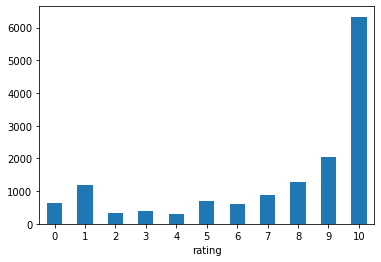

In [36]:
df['rating'].value_counts().sort_index().plot.bar(rot=0)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['rating'], random_state=7)
len(X_train), len(X_test)

(11043, 3682)

In [38]:
okt = Okt()

In [39]:
def okt_tokenizer(doc):
    target_tags = ['Noun', 'Verb', 'Adjective']
    return [word for word, pos in okt.pos(doc, norm=True, stem=True) if pos in target_tags]

In [40]:
tfidf = TfidfVectorizer(tokenizer=okt_tokenizer, max_features=2000, min_df=3, max_df=0.5)
X_train_tf = tfidf.fit_transform(X_train)
X_test_tf = tfidf.transform(X_test)
X_train_tf.shape, X_test_tf.shape

c:\Users\admin\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


((11043, 2000), (3682, 2000))

In [45]:
ridge = Ridge(alpha=2).fit(X_train_tf, y_train)
ridge.score(X_train_tf, y_train), ridge.score(X_test_tf, y_test)

c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

(0.566899479772788, 0.4636128798740403)

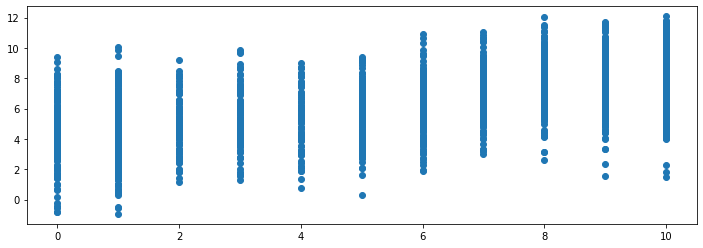

In [46]:
plt.figure(figsize=(12, 4))
plt.scatter(y_test, ridge.predict(X_test_tf))

In [51]:
logreg = LogisticRegression(C=1, max_iter=1000).fit(X_train_tf, y_train)
logreg.score(X_train_tf, y_train), logreg.score(X_test_tf, y_test)

c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

(0.5590872045639772, 0.47093970668115154)

c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


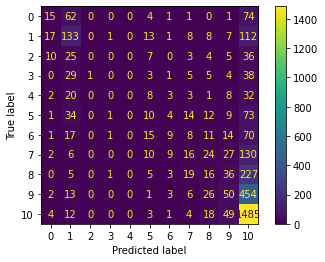

In [52]:
ConfusionMatrixDisplay.from_estimator(logreg, X_test_tf, y_test)